# Prediction of Heart disease using Deep Neural Network

The data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

Acknowledgement: This data comes from the University of California Irvine's Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/Heart+Disease.

The dataset contains 14 attributes:
1.  (age) :  age in years
2.  (sex) :  sex (1 = male; 0 = female)
3.  (cp) :  chest pain type
4.  (trestbps) :  Resting Blood presssure in mm Hg
5.  (chol) :  serum cholesterol in mg/dl
6.  (fbs) :  Fasting Blood Sugar in mg/dl
7.  (restecg) :  Resting Electrocadiographic Results
8.  (thalach) :  Maximum Heart Rate achieved
9.  (exang) :  exercise induced angina 
10. (oldpeak) :  ST depression induced by exercise relative to rest
11. (slope) :  slope of the Peak Exercise ST segment
12. (ca):  number of major vessels (0-3) colored by flourosopy
13. (thal) :  3 = normal; 6 = fixed defect; 7 = reversable defect
14. (target) :  (the predicted attribute) . Diagnosis of heart disease (angiographic disease status) Values:0(absence) & 1(presence)

# Importing the required libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.math import confusion_matrix
from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading and preparing data

In [3]:
#load and display dataframe
heart_disease=r"C:\Users\val-c\Desktop\heart disease\heart.csv"
hrt_dis=pd.read_csv(heart_disease)
hrt_dis.head() #display first-five rows

print('\n') #hold back

#display last five rows of the dataframe
hrt_dis.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [4]:
#no of rows and columns
print('(rows,cols)',hrt_dis.shape)

(rows,cols) (1025, 14)


In [5]:
# no need checking for duplicates cos of the binary values to some attributes in the dataframe

In [6]:
#display data types for the dataframe
hrt_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
#calculate the existing NaN/missing values in the datasets

hrt_dis.isna().sum().to_frame('Total')

,Total
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


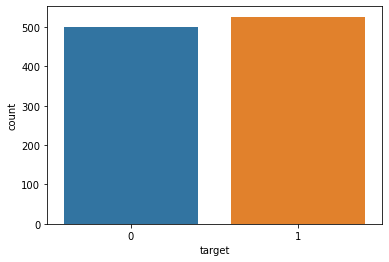

1    526
0    499
Name: target, dtype: int64


In [8]:
#show the number of persons who go heart disease or not.
y=('target')
sns.countplot(y, data=hrt_dis)
plt.show()
print(hrt_dis.target.value_counts())

526 number of persons got heart disease, while 499 got not

In [9]:
#statistics of the attributes
dist=hrt_dis.describe().transpose()
dist

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


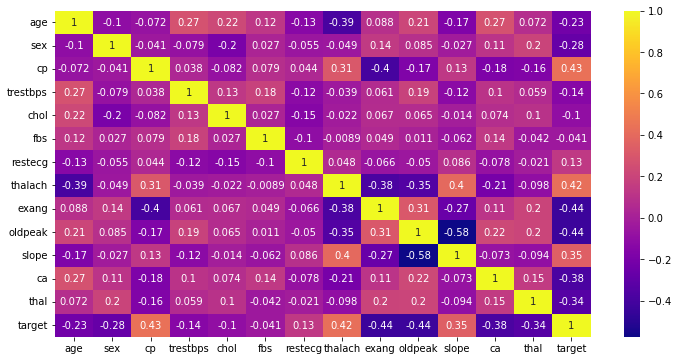

In [10]:
#correlation between attributes
plt.figure(figsize=(12,6))
corrl=hrt_dis.corr()
sns.heatmap(corrl, annot=True, cmap="plasma")
plt.show()

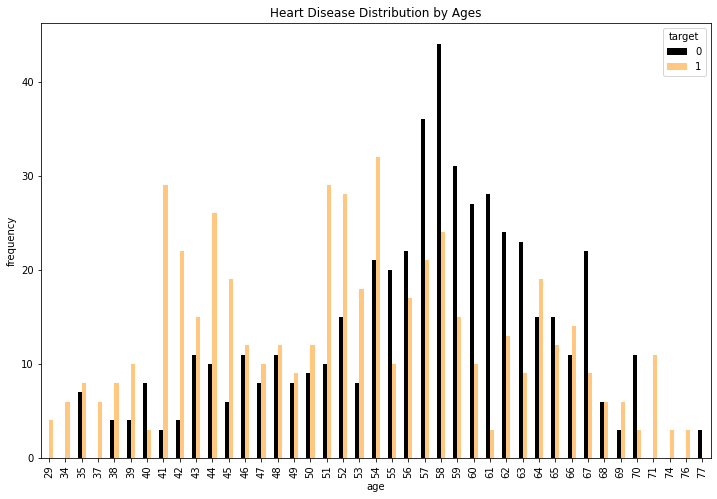

In [11]:
#visualize the distribution of ages to heart disease
pd.crosstab(hrt_dis.age, hrt_dis.target).plot(kind="bar",figsize=(12,8),cmap='copper')
plt.title("Heart Disease Distribution by Ages")
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

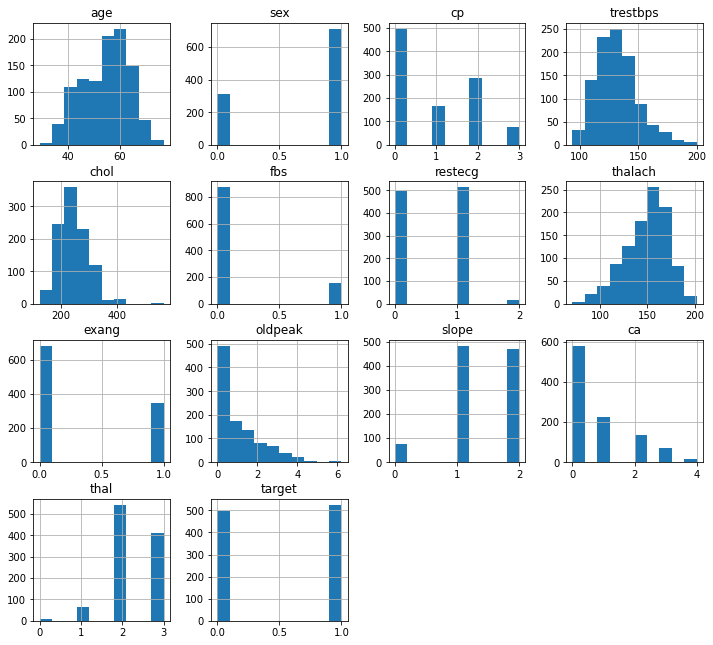

In [12]:
#explore the attributes distribution
hrt_dis.hist(figsize =(12, 11))
plt.show()#display dist...

# Creating training and testing sets

In [13]:
hrt_dis_features = hrt_dis.copy()
hrt_dis_labels = hrt_dis_features.pop('target') #drop attribute 'target'=heart disease

In [14]:
hrt_dis_features = np.array( hrt_dis_features)
hrt_dis_features

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [15]:
hrt_dis_labels[:5]

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [16]:
X=hrt_dis_features #features
y=hrt_dis_labels # target 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42) #split data into train , test

In [18]:
y_train[:5]

1020    1
479     0
227     1
910     0
362     1
Name: target, dtype: int64

In [19]:
print('X_train before')
X_train

X_train before


array([[59.,  1.,  1., ...,  2.,  0.,  2.],
       [58.,  1.,  0., ...,  1.,  3.,  3.],
       [44.,  0.,  2., ...,  1.,  1.,  2.],
       ...,
       [51.,  1.,  0., ...,  2.,  0.,  3.],
       [43.,  1.,  0., ...,  2.,  0.,  3.],
       [52.,  1.,  0., ...,  2.,  1.,  2.]])

In [20]:
print('X_test before')
X_test

X_test before


array([[62.,  0.,  0., ...,  2.,  0.,  2.],
       [53.,  0.,  2., ...,  2.,  0.,  0.],
       [55.,  1.,  0., ...,  1.,  1.,  3.],
       ...,
       [70.,  1.,  2., ...,  1.,  1.,  3.],
       [67.,  1.,  0., ...,  1.,  2.,  2.],
       [64.,  1.,  2., ...,  2.,  0.,  2.]])

# Normalization and Standardization 

In [21]:
normalizer = preprocessing.Normalizer() #normalizer function
normalized_train_X = normalizer.fit_transform(X_train) #normalize train set
#normalized_train_X
print('normalized X_train')
normalized_train_X[:1]

normalized X_train


array([[0.18767551, 0.00318094, 0.00318094, 0.44533173, 0.70298794,
        0.        , 0.00318094, 0.52167431, 0.00318094, 0.        ,
        0.00636188, 0.        , 0.00636188]])

In [22]:
normalizer = preprocessing.Normalizer()  #normalizer function
normalized_X_test= normalizer.fit_transform(X_test) #normalize test set
#normalized_X_test
print('normalized X_test')
normalized_X_test[:1]


normalized X_test


array([[0.20726746, 0.        , 0.        , 0.41453492, 0.69869193,
        0.        , 0.00334302, 0.54491284, 0.        , 0.        ,
        0.00668605, 0.        , 0.00668605]])

In [23]:
# Instantiating MinMaxScaler and using it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
print('standardized train_set')
X_train[:1]

standardized train_set


array([[0.625     , 1.        , 0.33333333, 0.43396226, 0.32646048,
        0.        , 0.5       , 0.70992366, 1.        , 0.        ,
        1.        , 0.        , 0.66666667]])

In [25]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical 

Y_train = to_categorical(y_train, num_classes=None) 
Y_test = to_categorical(y_test, num_classes=None) 

#print (y_train.shape) #nos of train dets
#print (y_train[:5])

# Creating the model

Deep neural network was configured here

In [26]:
model = Sequential()
model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation="softmax"))

In [27]:
model.summary() #summary of the model configuration

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________


# Compile the model

In [28]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer=opt,metrics=['accuracy'])


# Train the model

In [29]:
history=model.fit(X_train, Y_train, validation_data=(X_test,Y_test),epochs=1000, batch_size=10)
print('done')

Epoch 1/1000
72/72 [==============================] - 2s 9ms/step - loss: 0.6878 - accuracy: 0.6123 - val_loss: 0.6680 - val_accuracy: 0.8409
Epoch 2/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.6358 - accuracy: 0.7531 - val_loss: 0.5609 - val_accuracy: 0.8312
Epoch 3/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.5433 - accuracy: 0.7922 - val_loss: 0.4684 - val_accuracy: 0.8052
Epoch 4/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.4809 - accuracy: 0.8117 - val_loss: 0.4334 - val_accuracy: 0.8052
Epoch 5/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.4518 - accuracy: 0.8075 - val_loss: 0.4143 - val_accuracy: 0.8052
Epoch 6/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.4120 - accuracy: 0.8382 - val_loss: 0.4138 - val_accuracy: 0.8117
Epoch 7/1000
72/72 [==============================] - 0s 5ms/step - loss: 0.4189 - accuracy: 0.8438 - val_loss: 0.4245 - val_accuracy: 0.8149
Epoch 

72/72 [==============================] - 0s 3ms/step - loss: 0.3416 - accuracy: 0.8759 - val_loss: 0.3802 - val_accuracy: 0.8312
Epoch 59/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.3390 - accuracy: 0.8842 - val_loss: 0.3822 - val_accuracy: 0.8312
Epoch 60/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.3470 - accuracy: 0.8633 - val_loss: 0.3772 - val_accuracy: 0.8344
Epoch 61/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.3442 - accuracy: 0.8717 - val_loss: 0.3749 - val_accuracy: 0.8312
Epoch 62/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.3485 - accuracy: 0.8801 - val_loss: 0.3766 - val_accuracy: 0.8279
Epoch 63/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.3209 - accuracy: 0.8884 - val_loss: 0.3738 - val_accuracy: 0.8312
Epoch 64/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.3295 - accuracy: 0.8912 - val_loss: 0.3717 - val_accuracy: 0.8409
Epoch 65/1000

72/72 [==============================] - 0s 3ms/step - loss: 0.3086 - accuracy: 0.8828 - val_loss: 0.3429 - val_accuracy: 0.8604
Epoch 116/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.3029 - accuracy: 0.8912 - val_loss: 0.3428 - val_accuracy: 0.8539
Epoch 117/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.3257 - accuracy: 0.8912 - val_loss: 0.3417 - val_accuracy: 0.8734
Epoch 118/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.2976 - accuracy: 0.9024 - val_loss: 0.3434 - val_accuracy: 0.8636
Epoch 119/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.3091 - accuracy: 0.8954 - val_loss: 0.3393 - val_accuracy: 0.8571
Epoch 120/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.3010 - accuracy: 0.8982 - val_loss: 0.3407 - val_accuracy: 0.8571
Epoch 121/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.3020 - accuracy: 0.8940 - val_loss: 0.3451 - val_accuracy: 0.8474
Epoch 1

Epoch 172/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.3008 - accuracy: 0.8912 - val_loss: 0.3221 - val_accuracy: 0.8799
Epoch 173/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.2872 - accuracy: 0.9038 - val_loss: 0.3356 - val_accuracy: 0.8442
Epoch 174/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.3051 - accuracy: 0.8996 - val_loss: 0.3231 - val_accuracy: 0.8734
Epoch 175/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2760 - accuracy: 0.9052 - val_loss: 0.3285 - val_accuracy: 0.8604
Epoch 176/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.3027 - accuracy: 0.8926 - val_loss: 0.3210 - val_accuracy: 0.8604
Epoch 177/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2993 - accuracy: 0.8898 - val_loss: 0.3206 - val_accuracy: 0.8734
Epoch 178/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.2787 - accuracy: 0.9066 - val_loss: 0.3216 - val_accuracy:

Epoch 229/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.2589 - accuracy: 0.9163 - val_loss: 0.3120 - val_accuracy: 0.8799
Epoch 230/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.2767 - accuracy: 0.9052 - val_loss: 0.3029 - val_accuracy: 0.8896
Epoch 231/1000
72/72 [==============================] - 0s 5ms/step - loss: 0.2657 - accuracy: 0.9121 - val_loss: 0.3011 - val_accuracy: 0.8896
Epoch 232/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2688 - accuracy: 0.9135 - val_loss: 0.3035 - val_accuracy: 0.8929
Epoch 233/1000
72/72 [==============================] - 0s 5ms/step - loss: 0.2497 - accuracy: 0.9093 - val_loss: 0.3147 - val_accuracy: 0.8831
Epoch 234/1000
72/72 [==============================] - 0s 5ms/step - loss: 0.2865 - accuracy: 0.9066 - val_loss: 0.3099 - val_accuracy: 0.8831
Epoch 235/1000
72/72 [==============================] - 0s 5ms/step - loss: 0.2839 - accuracy: 0.8996 - val_loss: 0.2973 - val_accuracy:

Epoch 286/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2545 - accuracy: 0.9052 - val_loss: 0.2839 - val_accuracy: 0.8864
Epoch 287/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2644 - accuracy: 0.9024 - val_loss: 0.2797 - val_accuracy: 0.8961
Epoch 288/1000
72/72 [==============================] - 1s 8ms/step - loss: 0.2519 - accuracy: 0.9107 - val_loss: 0.2813 - val_accuracy: 0.8831
Epoch 289/1000
72/72 [==============================] - 0s 5ms/step - loss: 0.2345 - accuracy: 0.9219 - val_loss: 0.2753 - val_accuracy: 0.8961
Epoch 290/1000
72/72 [==============================] - 0s 6ms/step - loss: 0.2281 - accuracy: 0.9191 - val_loss: 0.2786 - val_accuracy: 0.8961
Epoch 291/1000
72/72 [==============================] - 0s 5ms/step - loss: 0.2482 - accuracy: 0.9149 - val_loss: 0.2750 - val_accuracy: 0.8994
Epoch 292/1000
72/72 [==============================] - 0s 6ms/step - loss: 0.2556 - accuracy: 0.9038 - val_loss: 0.2794 - val_accuracy:

Epoch 343/1000
72/72 [==============================] - 0s 5ms/step - loss: 0.2389 - accuracy: 0.9205 - val_loss: 0.2598 - val_accuracy: 0.8994
Epoch 344/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2459 - accuracy: 0.9135 - val_loss: 0.2663 - val_accuracy: 0.8929
Epoch 345/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2469 - accuracy: 0.9121 - val_loss: 0.2525 - val_accuracy: 0.9026
Epoch 346/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2405 - accuracy: 0.9107 - val_loss: 0.2540 - val_accuracy: 0.8929
Epoch 347/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2431 - accuracy: 0.9163 - val_loss: 0.2515 - val_accuracy: 0.8994
Epoch 348/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2396 - accuracy: 0.9261 - val_loss: 0.2563 - val_accuracy: 0.9091
Epoch 349/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2281 - accuracy: 0.9261 - val_loss: 0.2496 - val_accuracy:

Epoch 400/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2195 - accuracy: 0.9317 - val_loss: 0.2461 - val_accuracy: 0.8929
Epoch 401/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2271 - accuracy: 0.9205 - val_loss: 0.2419 - val_accuracy: 0.9058
Epoch 402/1000
72/72 [==============================] - 0s 5ms/step - loss: 0.2520 - accuracy: 0.9191 - val_loss: 0.2453 - val_accuracy: 0.8994
Epoch 403/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2174 - accuracy: 0.9331 - val_loss: 0.2424 - val_accuracy: 0.8961
Epoch 404/1000
72/72 [==============================] - 0s 5ms/step - loss: 0.2180 - accuracy: 0.9247 - val_loss: 0.2564 - val_accuracy: 0.8994
Epoch 405/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2215 - accuracy: 0.9261 - val_loss: 0.2395 - val_accuracy: 0.9026
Epoch 406/1000
72/72 [==============================] - 0s 5ms/step - loss: 0.2097 - accuracy: 0.9247 - val_loss: 0.2417 - val_accuracy:

Epoch 457/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2224 - accuracy: 0.9317 - val_loss: 0.2253 - val_accuracy: 0.8994
Epoch 458/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.1985 - accuracy: 0.9317 - val_loss: 0.2294 - val_accuracy: 0.9058
Epoch 459/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2030 - accuracy: 0.9317 - val_loss: 0.2272 - val_accuracy: 0.9058
Epoch 460/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2164 - accuracy: 0.9261 - val_loss: 0.2296 - val_accuracy: 0.9026
Epoch 461/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2040 - accuracy: 0.9331 - val_loss: 0.2310 - val_accuracy: 0.9091
Epoch 462/1000
72/72 [==============================] - 0s 5ms/step - loss: 0.2283 - accuracy: 0.9261 - val_loss: 0.2354 - val_accuracy: 0.9188
Epoch 463/1000
72/72 [==============================] - 0s 5ms/step - loss: 0.2264 - accuracy: 0.9261 - val_loss: 0.2296 - val_accuracy:

Epoch 514/1000
72/72 [==============================] - 0s 5ms/step - loss: 0.2043 - accuracy: 0.9372 - val_loss: 0.2320 - val_accuracy: 0.9091
Epoch 515/1000
72/72 [==============================] - 0s 5ms/step - loss: 0.1938 - accuracy: 0.9289 - val_loss: 0.2210 - val_accuracy: 0.9188
Epoch 516/1000
72/72 [==============================] - 0s 5ms/step - loss: 0.1974 - accuracy: 0.9344 - val_loss: 0.2267 - val_accuracy: 0.9253
Epoch 517/1000
72/72 [==============================] - 0s 5ms/step - loss: 0.2010 - accuracy: 0.9414 - val_loss: 0.2239 - val_accuracy: 0.9123
Epoch 518/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.1943 - accuracy: 0.9428 - val_loss: 0.2327 - val_accuracy: 0.9188
Epoch 519/1000
72/72 [==============================] - 0s 5ms/step - loss: 0.2081 - accuracy: 0.9317 - val_loss: 0.2275 - val_accuracy: 0.9318
Epoch 520/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2514 - accuracy: 0.9121 - val_loss: 0.2212 - val_accuracy:

Epoch 571/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.2004 - accuracy: 0.9331 - val_loss: 0.2082 - val_accuracy: 0.9318
Epoch 572/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1893 - accuracy: 0.9400 - val_loss: 0.2105 - val_accuracy: 0.9318
Epoch 573/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.2100 - accuracy: 0.9344 - val_loss: 0.2070 - val_accuracy: 0.9383
Epoch 574/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1990 - accuracy: 0.9414 - val_loss: 0.2116 - val_accuracy: 0.9351
Epoch 575/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.1745 - accuracy: 0.9568 - val_loss: 0.2195 - val_accuracy: 0.9221
Epoch 576/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1930 - accuracy: 0.9428 - val_loss: 0.2113 - val_accuracy: 0.9286
Epoch 577/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.2023 - accuracy: 0.9372 - val_loss: 0.2125 - val_accuracy:

Epoch 628/1000
72/72 [==============================] - 1s 7ms/step - loss: 0.1923 - accuracy: 0.9554 - val_loss: 0.2106 - val_accuracy: 0.9351
Epoch 629/1000
72/72 [==============================] - 1s 8ms/step - loss: 0.2151 - accuracy: 0.9331 - val_loss: 0.2201 - val_accuracy: 0.9318
Epoch 630/1000
72/72 [==============================] - 0s 7ms/step - loss: 0.2111 - accuracy: 0.9331 - val_loss: 0.2183 - val_accuracy: 0.9286
Epoch 631/1000
72/72 [==============================] - 1s 8ms/step - loss: 0.1840 - accuracy: 0.9442 - val_loss: 0.2157 - val_accuracy: 0.9318
Epoch 632/1000
72/72 [==============================] - 0s 6ms/step - loss: 0.2185 - accuracy: 0.9317 - val_loss: 0.2148 - val_accuracy: 0.9253
Epoch 633/1000
72/72 [==============================] - 0s 5ms/step - loss: 0.1835 - accuracy: 0.9470 - val_loss: 0.2174 - val_accuracy: 0.9351
Epoch 634/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2074 - accuracy: 0.9344 - val_loss: 0.2227 - val_accuracy:

Epoch 685/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.1998 - accuracy: 0.9317 - val_loss: 0.2083 - val_accuracy: 0.9286
Epoch 686/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2232 - accuracy: 0.9275 - val_loss: 0.2347 - val_accuracy: 0.9188
Epoch 687/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2029 - accuracy: 0.9400 - val_loss: 0.2215 - val_accuracy: 0.9188
Epoch 688/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2010 - accuracy: 0.9372 - val_loss: 0.2142 - val_accuracy: 0.9448
Epoch 689/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.1753 - accuracy: 0.9512 - val_loss: 0.2098 - val_accuracy: 0.9221
Epoch 690/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.1977 - accuracy: 0.9344 - val_loss: 0.2132 - val_accuracy: 0.9383
Epoch 691/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.1850 - accuracy: 0.9456 - val_loss: 0.2039 - val_accuracy:

Epoch 742/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.1961 - accuracy: 0.9400 - val_loss: 0.2130 - val_accuracy: 0.9318
Epoch 743/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.2012 - accuracy: 0.9317 - val_loss: 0.2127 - val_accuracy: 0.9318
Epoch 744/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.1785 - accuracy: 0.9428 - val_loss: 0.2013 - val_accuracy: 0.9578
Epoch 745/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1769 - accuracy: 0.9442 - val_loss: 0.2042 - val_accuracy: 0.9318
Epoch 746/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1663 - accuracy: 0.9456 - val_loss: 0.2064 - val_accuracy: 0.9416
Epoch 747/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2244 - accuracy: 0.9289 - val_loss: 0.2161 - val_accuracy: 0.9383
Epoch 748/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.1807 - accuracy: 0.9498 - val_loss: 0.2161 - val_accuracy:

Epoch 799/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.1578 - accuracy: 0.9568 - val_loss: 0.2022 - val_accuracy: 0.9448
Epoch 800/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1853 - accuracy: 0.9554 - val_loss: 0.2052 - val_accuracy: 0.9286
Epoch 801/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.2006 - accuracy: 0.9372 - val_loss: 0.2096 - val_accuracy: 0.9448
Epoch 802/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.1815 - accuracy: 0.9484 - val_loss: 0.2022 - val_accuracy: 0.9448
Epoch 803/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.2076 - accuracy: 0.9317 - val_loss: 0.2514 - val_accuracy: 0.9188
Epoch 804/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1833 - accuracy: 0.9428 - val_loss: 0.2080 - val_accuracy: 0.9221
Epoch 805/1000
72/72 [==============================] - 0s 4ms/step - loss: 0.1915 - accuracy: 0.9512 - val_loss: 0.2202 - val_accuracy:

Epoch 856/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1742 - accuracy: 0.9414 - val_loss: 0.2140 - val_accuracy: 0.9318
Epoch 857/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1740 - accuracy: 0.9484 - val_loss: 0.2065 - val_accuracy: 0.9383
Epoch 858/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1800 - accuracy: 0.9428 - val_loss: 0.2105 - val_accuracy: 0.9383
Epoch 859/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1888 - accuracy: 0.9512 - val_loss: 0.2125 - val_accuracy: 0.9383
Epoch 860/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.2057 - accuracy: 0.9400 - val_loss: 0.2026 - val_accuracy: 0.9513
Epoch 861/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1644 - accuracy: 0.9484 - val_loss: 0.2054 - val_accuracy: 0.9383
Epoch 862/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1878 - accuracy: 0.9456 - val_loss: 0.2050 - val_accuracy:

Epoch 913/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1856 - accuracy: 0.9456 - val_loss: 0.2146 - val_accuracy: 0.9253
Epoch 914/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1830 - accuracy: 0.9400 - val_loss: 0.2026 - val_accuracy: 0.9448
Epoch 915/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1615 - accuracy: 0.9568 - val_loss: 0.2014 - val_accuracy: 0.9448
Epoch 916/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1495 - accuracy: 0.9568 - val_loss: 0.2075 - val_accuracy: 0.9286
Epoch 917/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.2059 - accuracy: 0.9344 - val_loss: 0.2007 - val_accuracy: 0.9416
Epoch 918/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.2030 - accuracy: 0.9400 - val_loss: 0.2108 - val_accuracy: 0.9286
Epoch 919/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1703 - accuracy: 0.9470 - val_loss: 0.2089 - val_accuracy:

Epoch 970/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1772 - accuracy: 0.9414 - val_loss: 0.1982 - val_accuracy: 0.9286
Epoch 971/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1898 - accuracy: 0.9344 - val_loss: 0.2125 - val_accuracy: 0.9416
Epoch 972/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1811 - accuracy: 0.9498 - val_loss: 0.1983 - val_accuracy: 0.9383
Epoch 973/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1893 - accuracy: 0.9414 - val_loss: 0.2133 - val_accuracy: 0.9221
Epoch 974/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1774 - accuracy: 0.9498 - val_loss: 0.1997 - val_accuracy: 0.9416
Epoch 975/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1748 - accuracy: 0.9512 - val_loss: 0.1996 - val_accuracy: 0.9286
Epoch 976/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.1566 - accuracy: 0.9526 - val_loss: 0.2010 - val_accuracy:

# Visualizing the training results

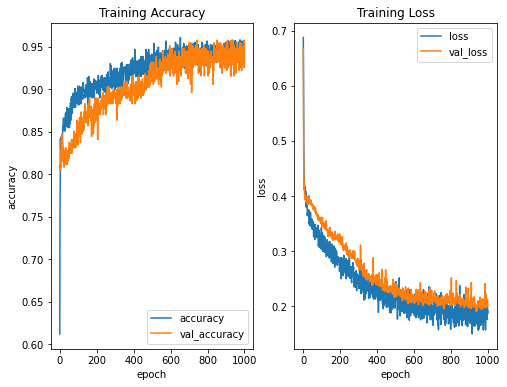

In [30]:

#training history
loss = history.history['loss']
val_loss = history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']


#'Training and Validation loss
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy']) #plot accuracy
plt.plot(history.history['val_accuracy']) #plot val_acc
plt.title('Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])

#Training and Validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['loss']) #plot loss
plt.plot(history.history['val_loss']) #plot val_loss
plt.title('Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'])

#display plot
plt.show()

# Evaluate accuracy on test set

In [31]:
#evaluate on test data
model.evaluate(X_test,Y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.2118 - accuracy: 0.9286


[0.21176424622535706, 0.9285714030265808]

# Make prediction on the test set

In [32]:
#predict on test data
predictions = model.predict(X_test)
#print(predictions.shape)

10/10 [==============================] - 0s 2ms/step


In [33]:
#classification report
pred_category = np.argmax(predictions, axis=1)

print("Results")
print('accuracy_score=',accuracy_score(y_test,pred_category))
print(classification_report(y_test, pred_category))

Results
accuracy_score= 0.9285714285714286
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       159
           1       0.92      0.94      0.93       149

    accuracy                           0.93       308
   macro avg       0.93      0.93      0.93       308
weighted avg       0.93      0.93      0.93       308



# Save model

In [34]:
model.save('heart disease')

INFO:tensorflow:Assets written to: heart disease\assets


# Summary of the Classification Measure

Accuracy: It is a measure of correctness that is achieved in true prediction.
          Simply measures how often the classifier makes the correct prediction.

Precision:It is a measure of correctness that is achieved in true prediction too.
           it tells how many predictions that are actually positive out of all the total positive predicted.

Recall:It measures the actual observations which are predicted correctly, i.e, 
       how many observations of positive class are actually predicted as positive. It is also known as Sensitivity. 
       Recall is a valid choice of evaluation metric when you want to capture as many positives as possible.
        
F1-Score: F1 score is a harmonic mean of Precision and Recall.
          F1 score sort of maintains a balance between the precision and recall for your classifier  